In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import sys
sys.path.insert(1, '/Users/samuelwitte/Desktop/Magnetized_Plasma/Axion_Infall/src')
from AMC_Density_Evolution import *
fileNW = np.loadtxt("../encounter_data/Interaction_params_NFW_AScut_wStripping.txt")
filePL = np.loadtxt("../encounter_data/Interaction_params_PL_AScut_wStripping.txt")
fs=17

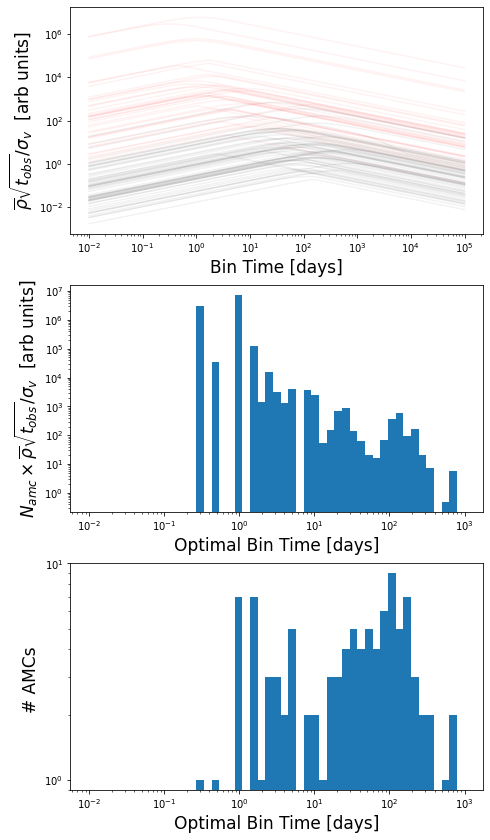

In [12]:
# NFW analysis
t_transit = np.logspace(-2, 5, 80) * 24 * 60**2 # initially days, converted to seconds
den = fileNW[:,3] # M / pc^3
rad = fileNW[:,4] #pc
bL = fileNW[:,5] * 3.086*10**13 # km
vel = fileNW[:, -1] * 3.086*10**13 / 2.998e5 # km/s
MamcL = rad**3 * 4*np.pi/3 * den # M

velDisp = np.sqrt(3.54 * 4.3e-3 * MamcL / rad) # km/s

fig, ax = plt.subplots(3, figsize=(7,12))
fig.tight_layout(pad=3.0)

#for j in range(len(fileNW[:,0])):
maxT = []
for j in range(100):
    flux_den = np.zeros_like(t_transit)
    for i,tt in enumerate(t_transit):     
        tmax = Transient_Time(bL[j], rad[j] * 3.086*10**13, vel[j]) # s
        
        t_center = tmax/2 #seconds
        if tt > tmax/2:
            t_use = tmax/2
        else:
            t_use = tt
        tlist = np.linspace(t_center - t_use, t_center + t_use, 200)
        dense_hold = np.zeros_like(tlist)
        for k in range(len(tlist)):
            dense_hold[k] = Transient_AMC_DensityEval(bL[j], rad[j]*3.086*10**13, den[j], vel[j], tlist[k], nfw=True)
        flux_den[i] = np.trapz(dense_hold, tlist) / np.sqrt(2*tt) / velDisp[j]
    maxT.append([t_transit[np.argmax(flux_den)] / (24*60**2), flux_den[np.argmax(flux_den)]])
    # print(np.column_stack((t_transit, flux_den)))
    if den[j] > 0.01:
        ax[0].plot(t_transit / (24*60**2), flux_den, 'r', alpha=0.05)
    else:
        ax[0].plot(t_transit / (24*60**2), flux_den, 'k', alpha=0.05)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Bin Time [days]', fontsize=fs)
ax[0].set_ylabel(r'$\overline{\rho} \sqrt{t_{obs}} / \sigma_v$  [arb units]', fontsize=fs)
maxTA = np.asarray(maxT);
#binsS = np.linspace(0.05, 500, 50)
binsS = np.logspace(-2, 3, 50)
ax[1].hist(maxTA[:,0], bins=binsS, weights=maxTA[:,1]);
ax[1].set_xlabel('Optimal Bin Time [days]', fontsize=fs);
ax[1].set_ylabel(r'$N_{amc} \times \overline{\rho} \sqrt{t_{obs}} / \sigma_v$  [arb units]', fontsize=fs);
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[2].hist(maxTA[:,0], bins=binsS);
ax[2].set_xlabel('Optimal Bin Time [days]', fontsize=fs);
ax[2].set_ylabel('# AMCs ',fontsize=fs);
ax[2].set_yscale('log')
ax[2].set_xscale('log')
#plt.savefig("../plots/TimeOptimization_NFW_.png", dpi=200)

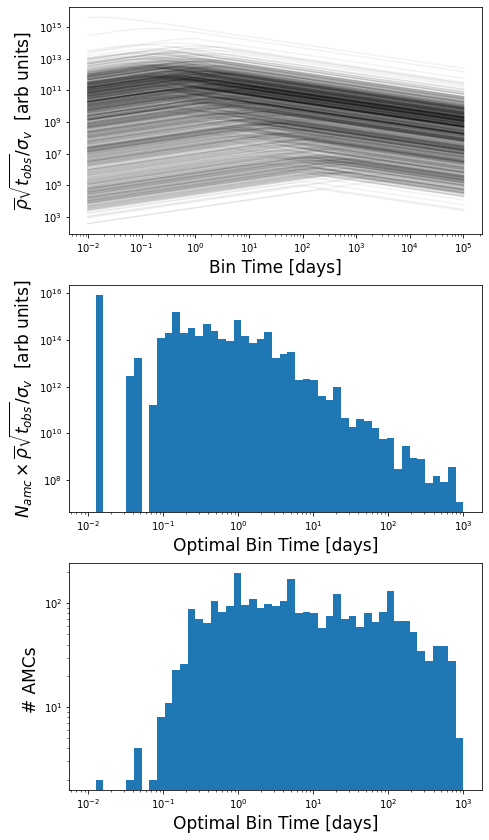

In [91]:
# PL analysis
t_transit = np.logspace(-2, 5, 80) * 24 * 60**2 # initially days, converted to seconds
den = filePL[:,3] # M / pc^3
rad = filePL[:,4] #pc
bL = filePL[:,5] * 3.086*10**13 # km
vel = filePL[:, -1] * 3.086*10**13 / 2.998e5 # km/s
MamcL = rad**3 * 4*np.pi/3 * den # M
velDisp = np.sqrt(1.73 * 4.3e-3 * MamcL / rad) # km/s

fig, ax = plt.subplots(3, figsize=(7,12))
fig.tight_layout(pad=3.0)

#for j in range(len(filePL[:,0])):
for j in range(1000):
    flux_den = np.zeros_like(t_transit)
    for i,tt in enumerate(t_transit):     
        tmax = Transient_Time(bL[j], rad[j] * 3.086*10**13, vel[j]) # s
        
        t_center = tmax/2 #seconds
        if tt > tmax/2:
            t_use = tmax/2
        else:
            t_use = tt
        tlist = np.linspace(t_center - t_use, t_center + t_use, 200)
        dense_hold = np.zeros_like(tlist)
        for k in range(len(tlist)):
            dense_hold[k] = Transient_AMC_DensityEval(bL[j], rad[j]*3.086*10**13, den[j], vel[j], tlist[k], nfw=False)
        flux_den[i] = np.trapz(dense_hold, tlist) / np.sqrt(2*tt) / velDisp[j]
    maxT.append([t_transit[np.argmax(flux_den)] / (24*60**2), flux_den[np.argmax(flux_den)]])
    # print(np.column_stack((t_transit, flux_den)))
    ax[0].plot(t_transit / (24*60**2), flux_den, 'k', alpha=0.05)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Bin Time [days]', fontsize=fs)
ax[0].set_ylabel(r'$\overline{\rho} \sqrt{t_{obs}} / \sigma_v$  [arb units]', fontsize=fs)
maxTA = np.asarray(maxT);
binsS = np.logspace(-2, 3, 50)
ax[1].hist(maxTA[:,0], bins=binsS, weights=maxTA[:,1]);
ax[1].set_xlabel('Optimal Bin Time [days]', fontsize=fs);
ax[1].set_ylabel(r'$N_{amc} \times \overline{\rho} \sqrt{t_{obs}} / \sigma_v$  [arb units]', fontsize=fs);
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[2].hist(maxTA[:,0], bins=binsS);
ax[2].set_xlabel('Optimal Bin Time [days]', fontsize=fs);
ax[2].set_ylabel('# AMCs ',fontsize=fs);
ax[2].set_yscale('log')
ax[2].set_xscale('log')
plt.savefig("../plots/TimeOptimization_PL_.png", dpi=200)